In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from bareml.machinelearning.supervised import LinearRegression
from bareml.machinelearning.utils.preprocessing import PolynomialFeatures

In [4]:
x = np.arange(0,2*np.pi,0.2)
y = np.sin(x) + 0.2*np.random.randn(len(x))

# for drawing
x_true = np.arange(0,2*np.pi,0.05)
y_true = np.sin(x_true)

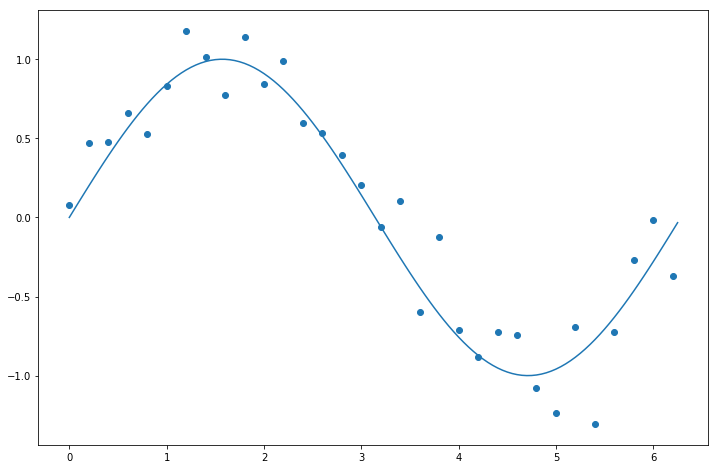

In [5]:
fig, ax  = plt.subplots(1,1,figsize=(12,8))
plt.scatter(x,y)
plt.plot(x_true, y_true)

In [6]:
reg = LinearRegression()

In [7]:
degrees = [1,3,9]
preds = []

for degree in degrees:
    pol = PolynomialFeatures(degree, include_bias=False)
    X = pol.fit_transform(x[:,None])
    X_true = pol.transform(x_true[:,None])
    reg.fit(X,y)
    y_pred = reg.predict(X_true)
    preds.append(y_pred)

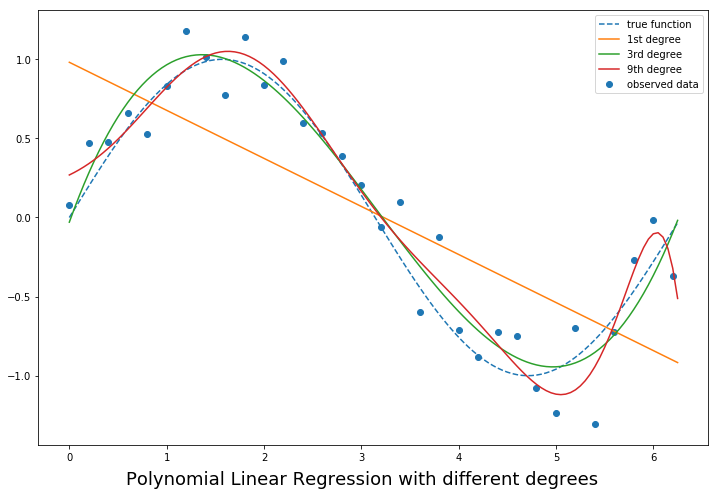

In [8]:
fig, ax  = plt.subplots(1,1,figsize=(12,8))
fig.suptitle('Polynomial Linear Regression with different degrees', y=0.08, x=0.5, fontsize=18)
ax.scatter(x,y,label='observed data')
ax.plot(x_true, y_true, '--', label='true function')
for i, y_pred in enumerate(preds):
    d = degrees[i]
    if d == 1:
        label = '1st degree'
    elif d == 2:
        label = '2nd degree'
    elif d == 3:
        label = '3rd degree'
    else:
        label = str(degrees[i]) + 'th degree'
    ax.plot(x_true, y_pred, label=label)
    
ax.legend()